# Running AOS on AuxTel images 

In [35]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')
    
#dataId = {'dayObs': '2020-03-15', 'seqNum': 162}
#dataRef = butler.dataRef('raw', **dataId)
registry = butler.registry
for x in registry.queryCollections("refcats*"):
    print(x)

refcats/DM-28636
refcats


In [ ]:
dataTypes = registry.queryDatasetTypes()
for dataType in dataTypes:
    print(dataType)

In [ ]:
registry = butler.registry
dataTypes = registry.queryDatasetTypes()
for dataType in dataTypes[:10]:
    print(dataType)

In [2]:
registry = butler.registry
for x in registry.queryCollections("LATISS/*"):
    print(x)

LATISS/raw/all
LATISS/calib/DM-28636
LATISS/calib/DM-28636/unbounded
LATISS/calib/DM-28636/curated/19700101T000000Z
LATISS/calib/DM-28636/curated/20180101T000000Z
LATISS/calib
LATISS/calib/unbounded
LATISS/calib/u/mreuter/20210611


In [9]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/')
registry = butler.registry
for x in registry.queryCollections("refcats*"):
    print(x)

refcats/DM-28636
refcats


    butler query-collections /repo/main "refcat*"

In [ ]:
list(registry.queryDatasets(datasetType='*',collections=["refcats/DM-28636"]))[:5]

In [ ]:
for ref in datasetRefs[:10]:
    print(ref.dataId)
    print(ref.dataId.keys())

In [114]:
for x in registry.queryCollections("u/*fish*"):
    print(x)

In [3]:
datasetRefs = list(registry.queryDatasets(datasetType='bias', collections=['LATISS/calib'],
                                          
                                         ))
for ref in datasetRefs:
    print(ref.dataId)
    print(ref.dataId.keys())

In [38]:
datasetRefs = list(registry.queryDatasets( datasetType='raw', collections=['LATISS/raw/all'],
                                          
                                         ))
for ref in datasetRefs:
    print(ref.dataId)
    print(ref.dataId.keys())

{instrument: 'LATISS', detector: 0, exposure: 2019030500001, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030500002, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030500003, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600000, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600011, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600012, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600013, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600014, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600015, ...}
{instrument, detector, exposure}
{instrument: 'LATISS', detector: 0, exposure: 2019030600016, ...}
{instrument, detector, exposure}
{instrumen

Query by observation date from https://lsstc.slack.com/archives/C01FBUGM2CV/p1621975733188100

In [ ]:
from lsst.daf.butler import Timespan

from astropy.time import Time

where = "exposure.timespan OVERLAPS ts"  # kwarg for query method
t1 = Time("2021-06-08")
t2 = Time("2021-06-09")
bind = {"ts": Timespan(begin=t1, end=t2)}  # another kwarg; t1 and t2 are astropy.time.Time

datasetRefs = list(registry.queryDatasets(instrument='LATISS', datasetType='raw', collections=['LATISS/raw/all'],
                                          where=where, bind=bind
                                         ))
for ref in datasetRefs[:10]:
    print(ref.dataId)

Try again , from https://lsstc.slack.com/archives/C01FBUGM2CV/p1615989138020000?thread_ts=1615988082.017900&cid=C01FBUGM2CV : 


In [ ]:
datasetRefs = list(registry.queryDatasets(instrument='LATISS', datasetType='raw', collections=['LATISS/raw/all'],
                                          where="exposure.day_obs=20210608"
                                         ))
datasetRefs[0]

Pick one day where intra/extra donuts were taken https://confluence.lsstcorp.org/display/LSSTCOM/2021-06-08+Aux-Tel+Night+Log  
intra - 2021060800400
extra - 2021060800401


In [22]:
dataId = datasetRefs[0].dataId

In [2]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')
exposure_intra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021060800400},
                      collections=['LATISS/raw/all'])

(minimum=(0, 0), maximum=(543, 2047)): (minimum=(0, 0), maximum=(575, 2047))


In [10]:
print(exposure_intra.getMetadata()['FOCUSZ'])

-0.770438730716705


In [11]:
butler = dafButler.Butler('/repo/main/', instrument='LATISS')
exposure_extra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021060800401},
                      collections=['LATISS/raw/all'])
print(exposure_extra.getMetadata()['FOCUSZ'])

(minimum=(0, 0), maximum=(543, 2047)): (minimum=(0, 0), maximum=(575, 2047))


0.829561293125153


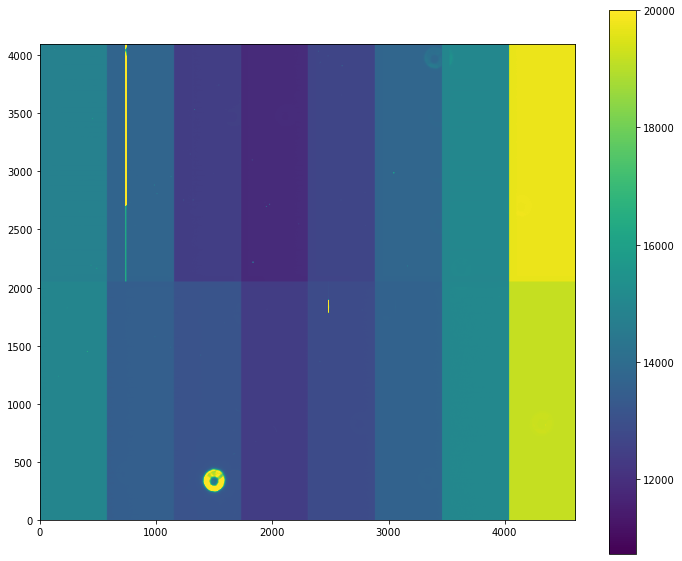

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))
plt.imshow(exposure_extra.image.array, origin='lower',vmax=20000)# vmax=50)
plt.colorbar()

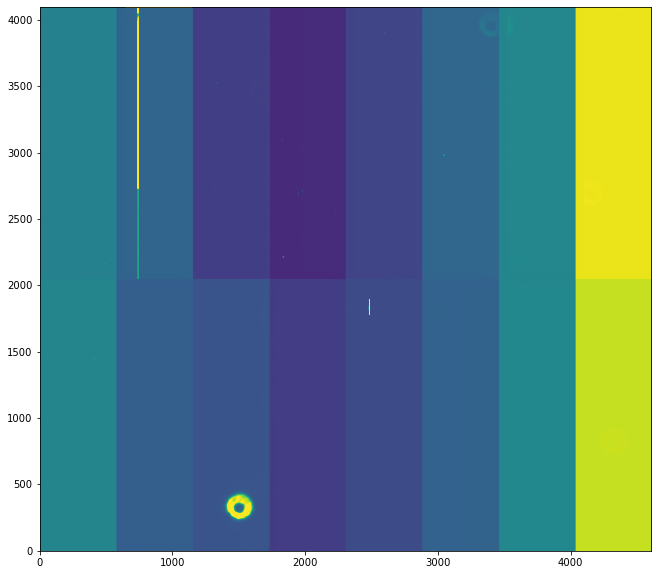

In [83]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(exposure_intra.image.array, origin='lower',vmax=20000)

Select the cutout around the donut on a single amp:

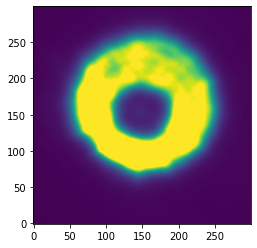

In [90]:
radius = 150
xcen = 1500
ycen = 320
donut_intra = exposure_intra.image.array[ycen-radius:ycen+radius,
                                         xcen-radius:xcen+radius,]
plt.imshow(donut_intra, origin='lower',vmax=20000)

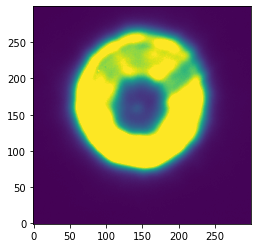

In [91]:
donut_extra = exposure_extra.image.array[ycen-radius:ycen+radius,
                                         xcen-radius:xcen+radius,]
plt.imshow(donut_extra, origin='lower',vmax=20000)

since it's on the same amp, the background would cancel - subtracting the donuts would show the difference in the wavefront 

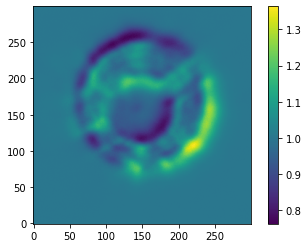

In [100]:
plt.imshow(donut_intra/donut_extra,origin='lower')
plt.colorbar()

Given that we have the donuts,  I wonder if I could feed that to the AOS pipeline ... 

I run the following yaml config 

    description: ISR basic processing pipeline
    instrument: lsst.obs.lsst.Latiss
    tasks:
      isr:
        class: lsst.ip.isr.isrTask.IsrTask
        config:
          connections.outputExposure: postISRCCD
          doApplyGains: true
          doBias: false
          doBrighterFatter: false
          doCrosstalk: false
          doDark: false
          doDefect: false
          doFlat: false
          doFringe: false
          doInterpolate: false
          doLinearize: false
          doNanMasking: false
          doOverscan: true
          doVariance: false

        
And this pipeline task

    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib  --output u/scichris/Latiss/postISR --pipeline /project/scichris/aos/testLatiss.yaml  --register-dataset-types
    
    

I read in the results:
    

In [10]:
from lsst.daf import butler as dafButler
#butler = dafButler.Butler('/repo/main/u/scichris/Latiss/postISR', instrument='LATISS')


In [1]:
from astropy.io import fits

In [2]:
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR/20210826T010243Z/\
postISRCCD/20210608/\
AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR_20210826T010243Z.fits')


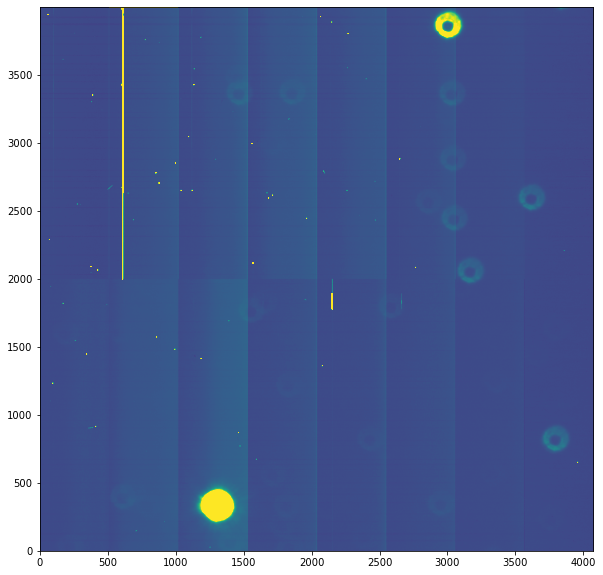

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower', vmax=400)

This shows that the postISR settings were not enough - need to also use the calibs. 


    description: ISR basic processing pipeline
    instrument: lsst.obs.lsst.Latiss
    tasks:
      isr:
        class: lsst.ip.isr.isrTask.IsrTask
        config:
          connections.outputExposure: postISRCCD
          doApplyGains: True
          doBias: True
          doBrighterFatter: false
          doCrosstalk: false
          doDark: True
          doDefect: false
          doFlat: false
          doFringe: false
          doInterpolate: false
          doLinearize: false
          doNanMasking: false
          doOverscan: true
          doVariance: false

        
And this pipeline task

    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,u/czw/DM-30849/calib  --output u/scichris/Latiss/postISR2 --pipeline /project/scichris/aos/testLatiss2.yaml  --register-dataset-types
    
I ended up removing `doDark`,  and adding the `LATISS/calib` because it did not want to work with the command above. I used 

    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-30849/calib  --output u/scichris/Latiss/postISR2 --pipeline /project/scichris/aos/testLatiss2.yaml  --register-dataset-types
    
    

The result is (doOverscan, doApplyGains, doBias):

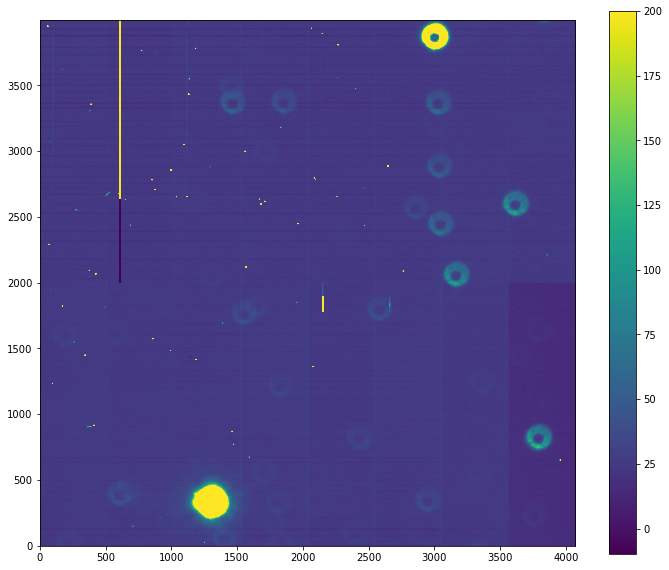

In [5]:
import matplotlib.pyplot as plt
from astropy.io import fits
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR2/\
20210826T222933Z/postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR2_20210826T222933Z.fits')
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

I wonder what would happen if using these calibs I would set doDark as well : 


    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-30849/calib  --output u/scichris/Latiss/postISR3 --pipeline /project/scichris/aos/testLatiss2.yaml  --register-dataset-types

ok - it complains that it doesn't have dark... 


Can it do doOverscan, doApplyGains, doBias, doCrosstalk ? No...

   RuntimeError: Attempted to correct crosstalk without crosstalk coefficients.
    RuntimeError: Attempted to correct crosstalk without crosstalk coefficients.
    
Can it doFlat ? No  - complains it doesn't have flat ... 



Try using different calibs recommended by Merlin: `u/czw/DM-28920/calib.20210720` : 
        
      srun -I -t 24:00:00 --pty bash
      source "/software/lsstsw/stack/loadLSST.bash"
      setup lsst_distrib
          
      pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR4 --pipeline /project/scichris/aos/testLatiss2.yaml  --register-dataset-types
        
First: doApplyGains, doBias, doOverscan, doDark 

Note: I get that if I set as `--input LATISS/raw/all,u/czw/DM-28920/calib.20210720` only 
   ...
   FileNotFoundError: Not enough datasets (0) found for non-optional connection isr.camera (camera) with minimum=1 for quantum data ID {instrument: 'LATISS', detector: 0, exposure: 2021060800400, ...}.
   

I do not get that error if I set as `--input LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720`. Why ? 


The result of doing `doApplyGains, doBias, doOverscan, doDark` :

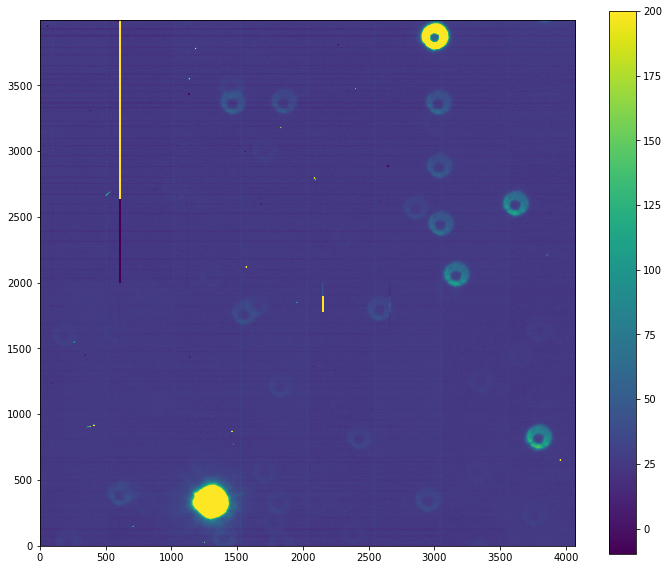

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR4/\
20210901T211322Z/postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR4_20210901T211322Z.fits')
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

The lower-right amp seems better... Try adding `doInterpolate` 

    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR5 --pipeline /project/scichris/aos/testLatiss3.yaml  --register-dataset-types
    
    
The result of `doApplyGains, doBias, doOverscan, doDark, doInterpolate`: 

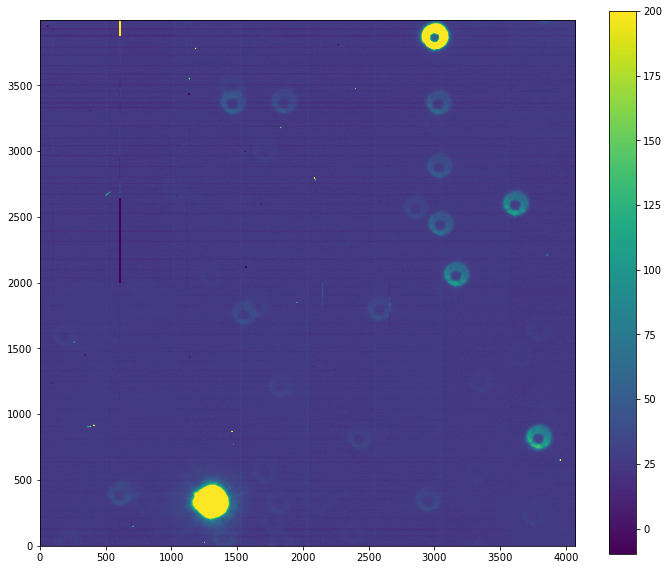

In [5]:
%matplotlib inline
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR5/20210901T211731Z/postISRCCD/20210608/\
AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR5_20210901T211731Z.fits')


fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

This took care of some of the saturation, but not all... Try adding `doDefect` : 
    
    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR6 --pipeline /project/scichris/aos/testLatiss3.yaml  --register-dataset-types
    
 Result of `doApplyGains, doBias, doOverscan, doDark, doInterpolate, doDefect` : 
 
 

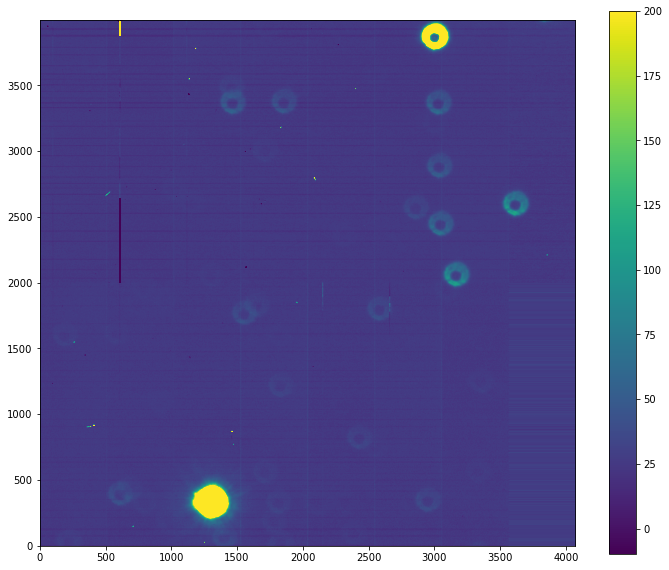

In [7]:
%matplotlib inline
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR6/20210901T212030Z/\
postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR6_20210901T212030Z.fits')


fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

I don't think it's any better... Try using `doFlat` instead of `doApplyGains` : 
    
    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR7 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
This is the `doBias`, `doDark`, `doFlat` `doInterpolate` , `doOverscan`: 

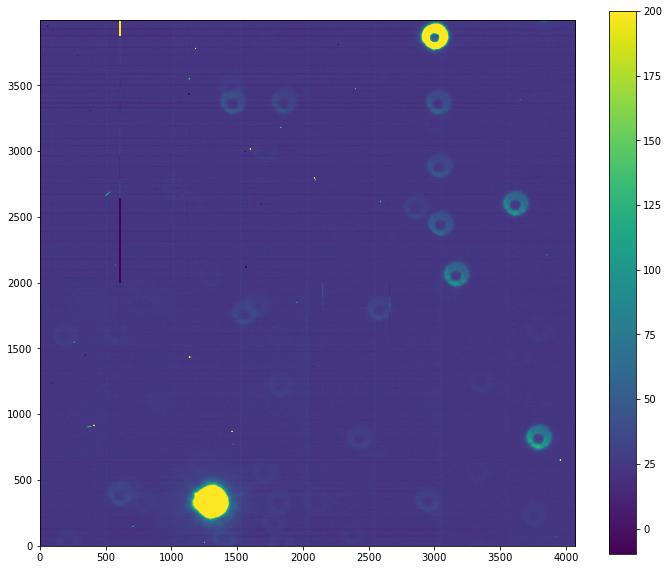

In [9]:
%matplotlib inline
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR7/\
20210901T212737Z/postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR7_20210901T212737Z.fits')


fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

Not any better than with `doApplyGains`.... Still I see the amp-to-amp differences... add `doFringe` and `doLinearize`:
    
    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR8 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
Result of `doBias`, `doDark`, `doFlat` `doInterpolate` , `doOverscan`, `doFringe`, `doLinearize`: 

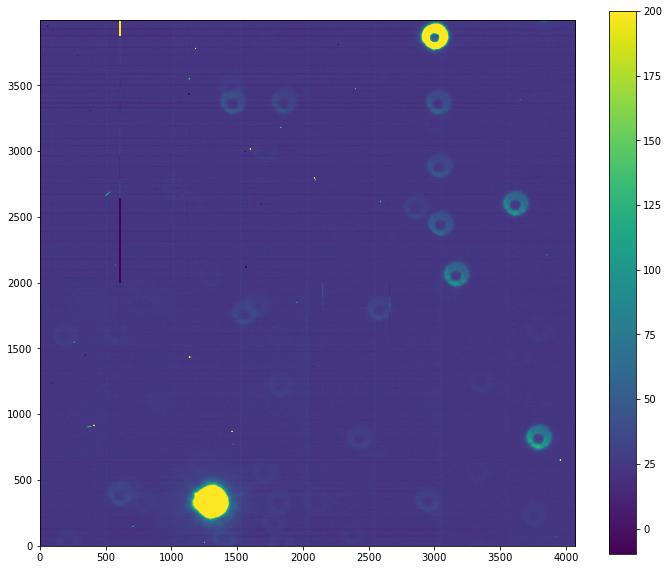

In [10]:
%matplotlib inline
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR8/20210901T213153Z/\
postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR8_20210901T213153Z.fits')

fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

Set `doLinearize` to False , set `overscan.FitType to MEDIAN_PER_ROW` 

    pipetask run --processes 9  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR9 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
    
 I get 
 
     setattr(tmpConfig, finalField, value)
  File "/software/lsstsw/stack_20210813/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/pex_config/22.0.0+7b3a3f865e/python/lsst/pex/config/configurableField.py", line 150, in __setattr__
    self._value.__setattr__(name, value, at=at, label=label)
  File "/software/lsstsw/stack_20210813/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/pex_config/22.0.0+7b3a3f865e/python/lsst/pex/config/config.py", line 1358, in __setattr__
    raise AttributeError("%s has no attribute %s" % (_typeStr(self), attr))
AttributeError: lsst.ip.isr.overscan.OverscanCorrectionTaskConfig has no attribute FitType


The comment on slack is "LATISS calibs should now be available at the summit using the u/czw/DM-28920/calib.20210720 collection.  There should be defects (incomplete but usable), bias, dark, flats (RG610~empty and empty~empty filters), and an unverified linearity correction (I suggest skipping that for now)." 

In [11]:
from lsst.ip.isr.isrTask import IsrTask
isrConfig = IsrTask.ConfigClass()

In [ ]:
isrConfig.overscanFitType.

Show the result of 

    config:
      connections.outputExposure: postISRCCD
      doApplyGains: false
      doBias: true
      doBrighterFatter: false
      doCrosstalk: false
      doDark: true
      doDefect: false
      doFlat: true
      doFringe: true
      doInterpolate: true
      doLinearize: false
      doNanMasking: false
      doOverscan: true
      doVariance: false
      overscanFitType: "MEDIAN_PER_ROW"

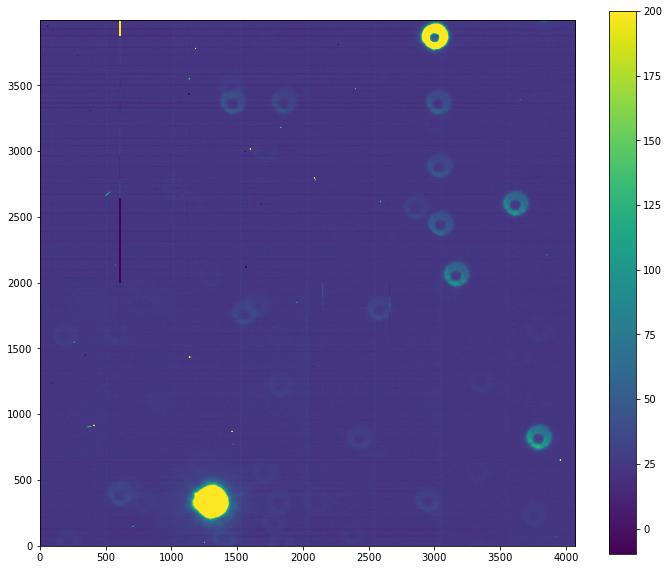

In [17]:
%matplotlib inline
hdul = fits.open('/repo/main/u/scichris/Latiss/postISR9/20210901T221651Z/\
postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR9_20210901T221651Z.fits')
fig = plt.figure(figsize=(12, 10))
plt.imshow(hdul[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

I try setting it to just `MEDIAN` : 
    
    overscanFitType: "MEDIAN"
        
And run 

    pipetask run  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR10 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types

Show the result:

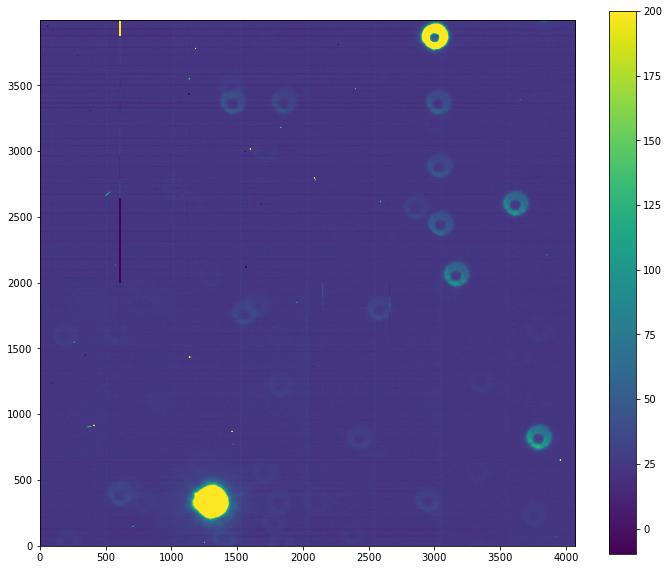

In [25]:
%matplotlib inline
hdula = fits.open('/repo/main/u/scichris/Latiss/postISR10/\
20210901T222416Z/postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR10_20210901T222416Z.fits'
                )
fig = plt.figure(figsize=(12, 10))
plt.imshow(hdula[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

In [24]:
import numpy as np
np.where(hdul[1].data - hdula[1].data > 0)

(array([], dtype=int64), array([], dtype=int64))

There is a doc about building the configuration https://pipelines.lsst.io/v/weekly/modules/lsst.pipe.base/creating-a-pipeline.html?highlight=yaml%20isr 
    
    

Run with updated config:

    pipetask run  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR11 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types



Where the config was 
    
    isr:
        class: lsst.ip.isr.isrTask.IsrTask
        config:
          connections.outputExposure: postISRCCD
          doApplyGains: false
          doBias: true
          doBrighterFatter: false
          doCrosstalk: false
          doDark: true
          doDefect: false
          doFlat: true
          doFringe: true
          doInterpolate: true
          doLinearize: false
          doNanMasking: false
          doOverscan: true
          doVariance: false
          python: OverscanCorrectionTask.ConfigClass.fitType = 'MEDIAN_PER_ROW'

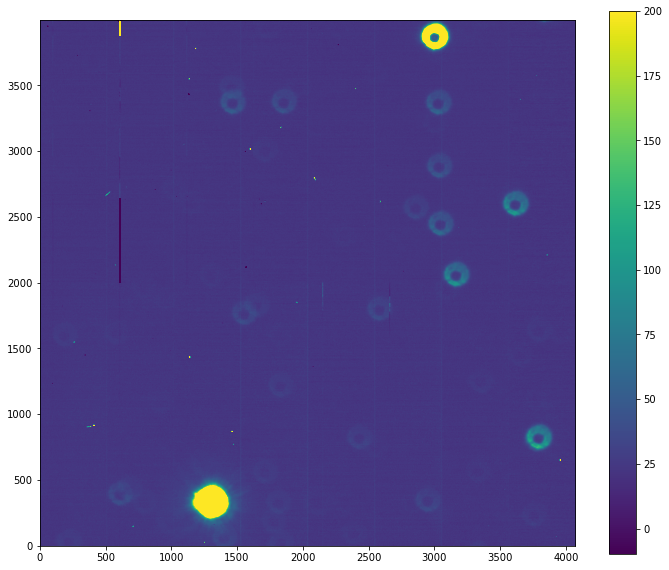

In [27]:
%matplotlib inline
hdula = fits.open('/repo/main/u/scichris/Latiss/postISR11/\
20210901T225749Z/postISRCCD/20210608/AT_O_20210608_000400/\
postISRCCD_LATISS_RG610~empty_AT_O_20210608_000400_RXX_S00_u_scichris_Latiss_postISR11_20210901T225749Z.fits'
                 )
fig = plt.figure(figsize=(12, 10))
plt.imshow(hdula[1].data, origin='lower',vmin=-10,vmax=200)
plt.colorbar()

ok, that's as good as it gets. Would be able to remove the amp-to-amp lines with better electronics and better calibs (perhaps )

Move on to integrating these into an AOS pipeline 



In [2]:
import palpy

In [3]:
# Some basic imports
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# This allows us to run command line tasks from inside the notebook easier
from lsst.ts.wep.Utility import runProgram, writePipetaskCmd, writeCleanUpRepoCmd

# Location of ts_wep
ts_wep_dir = os.environ['TS_WEP_DIR']

# Import Gen 3 Butler
from lsst.daf import butler as dafButler

In [5]:

# First specify the repository location
repoDir = '/project/scichris/aos/latiss/'

# Next we create a name for the output of our pipeline run
runName = 'notebook_test'

# We are going to use comcam data so we specify the correct instrument
instrument = 'lsst.obs.lsst.Latiss'

# Tell the pipeline which existing data in the repository to use
collections = 'refcats,LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720'

# And finally the file that specifies our pipeline tasks and configurations shown above
pipelineYaml = 'latissPipeline.yaml'

   
Run this pipetask:


    pipetask run -p /project/scichris/aos/testLatiss5.yaml  -j 2 --register-dataset-types
    
    pipetask run  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  refcats,LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR12 --pipeline /project/scichris/aos/testLatiss5.yaml  --register-dataset-types
    
    
   
   
containing 

    description: ISR basic processing pipeline
    instrument: lsst.obs.lsst.Latiss
    tasks:
      isr:
        class: lsst.ip.isr.isrTask.IsrTask
        config:
          connections.outputExposure: postISRCCD
          doApplyGains: false
          doBias: true
          doBrighterFatter: false
          doCrosstalk: false
          doDark: true
          doDefect: false
          doFlat: true
          doFringe: true
          doInterpolate: true
          doLinearize: false
          doNanMasking: false
          doOverscan: true
          doVariance: false
          python: OverscanCorrectionTask.ConfigClass.fitType = 'MEDIAN_PER_ROW'


      generateDonutCatalogOnlineTask:
        class: lsst.ts.wep.task.GenerateDonutCatalogOnlineTask.GenerateDonutCatalogOnlineTask
          # Here we specify the configurations for pointing that we added into the class
          # GenerateDonutCatalogOnlineTaskConfig.
        config:
          boresightRa: 0.
          boresightDec: 0.0
          boresightRotAng: 90.0
      estimateZernikesFamTask:
        class: lsst.ts.wep.task.EstimateZernikesFamTask.EstimateZernikesFamTask
        config:
            # And here we specify the configuration settings originally defined in
            # EstimateZernikesFamTaskConfig.
          donutTemplateSize: 160
          donutStampSize: 160 
          initialCutoutPadding: 40

### Create the donut catalog

#### Set configurations for the task

Load the `ts_wep` modules

In [31]:
from lsst.ts.wep.task.GenerateDonutCatalogOnlineTask import (GenerateDonutCatalogOnlineTask, 
                                                             GenerateDonutCatalogOnlineTaskConfig)

Get the boresight and pointing angle from the raw exposure 

In [32]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/')
rawImage = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021060800400},
                      collections=['LATISS/raw/all'])

/lsstdata/offline/instrument/LATISS/storage/2021-06-08/AT_O_20210608_000400-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


In [59]:
a = rawImage.getWcs()
px = a.getPixelScale()
px.asArcseconds()

In [66]:
rawImage.getWcs().getPixelScale().asArcseconds()

0.09569499991688767

In [64]:
px = a.getPixelScale()

In [65]:
px.asArcseconds()

0.09569499991688767

In [ ]:
print(rawImage.getMetadata()[:10])

In [33]:
rawImVisitInfo = rawImage.getInfo().getVisitInfo()
print(f"Boresight Ra, Dec is: {rawImVisitInfo.getBoresightRaDec()}, Boresight Rotation Angle in degrees is: {rawImVisitInfo.getBoresightRotAngle().asDegrees()}")

Boresight Ra, Dec is: (297.8343896415, -58.4925471458), Boresight Rotation Angle in degrees is: 25.7151863184216


Pass the boresight information to `ts_wep` : 

In [34]:
donutCatConfig = GenerateDonutCatalogOnlineTaskConfig()
donutCatConfig.boresightRa = rawImVisitInfo.getBoresightRaDec().getRa().asDegrees()
donutCatConfig.boresightDec = rawImVisitInfo.getBoresightRaDec().getDec().asDegrees()
donutCatConfig.boresightRotAng = rawImVisitInfo.getBoresightRotAngle().asDegrees()
donutCatConfig.filterName = 'phot_g_mean'

In [35]:
# instantiate the task with the appropriate config 
donutCatTask = GenerateDonutCatalogOnlineTask(config=donutCatConfig)

#### Prepare the data for the task

Need to get the reference catalog get available to `butler` repository: 

In [29]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')
registry = butler.registry

deferredList = []
datasetGenerator = registry.queryDatasets(datasetType="gaia_dr2_20200414", 
                                          collections=["refcats"]).expanded()
for ref in datasetGenerator:
    deferredList.append(butler.getDeferred(ref, collections=["refcats"]))

In [11]:
#print the first dataId in the list 
#deferredList[0].dataId

{htm7: 133534}

In [46]:
# data = butler.get('gaia_dr2_20200414', dataId=deferredList[0].dataId,
#                   collections='refcats'
#     )

In [56]:
# Show the schema of the data
# data.columns.getSchema()

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['D'](name="phot_g_mean_flux", doc="flux in filter phot_g_mean", units="nJy"), Key<D>(offset=24, nElements=1)),
    (Field['D'](name="phot_bp_mean_flux", doc="flux in filter phot_bp_mean", units="nJy"), Key<D>(offset=32, nElements=1)),
    (Field['D'](name="phot_rp_mean_flux", doc="flux in filter phot_rp_mean", units="nJy"), Key<D>(offset=40, nElements=1)),
    (Field['D'](name="phot_g_mean_fluxErr", doc="flux uncertainty in filter phot_g_mean", units="nJy"), Key<D>(offset=48, nElements=1)),
    (Field['D'](name="phot_bp_mean_fluxErr", doc="flux uncertainty in filter phot_bp_mean", units="nJy"), Key<D>(offset=56, nElements=1)),
    (Field['D'](name="phot_rp_mean_fluxErr", doc="flux uncertainty 

Info about using the Gaia DR2 in LSST format https://community.lsst.org/t/gaia-dr2-reference-catalog-in-lsst-format/3901 

Change the mapping of the object loader and run the task to retrieve the reference object catalog:

In [36]:
camera = "LATISS"
refObjLoader = donutCatTask.getRefObjLoader(deferredList)
refObjLoader.config.filterMap = {"g": "phot_g_mean" }


donutCatStruct = donutCatTask.run(camera, deferredList)

root INFO: Loading reference objects from region bounded by [297.69231379, 297.98077969], [-58.56822692, -58.41836906] RA Dec
root INFO: Loaded 221 reference objects


In [37]:
donutCatStruct

Struct(donutCatalog=     coord_ra  coord_dec   centroid_x   centroid_y   source_flux detector
0    5.198804  -1.021757   653.219991   615.972550  5.052877e+04  RXX_S00
1    5.196814  -1.021203  3189.238069   720.084519  2.360729e+04  RXX_S00
2    5.198801  -1.021199  1177.698091  1698.170744  1.386361e+04  RXX_S00
3    5.197345  -1.020926  2910.604693  1517.382422  1.437050e+04  RXX_S00
4    5.198023  -1.021826  1380.952142   101.916337  2.045614e+04  RXX_S00
..        ...        ...          ...          ...           ...      ...
216  5.197414  -1.019989  3717.629063  3371.528097  1.149424e+05  RXX_S00
217  5.198141  -1.019966  3001.092591  3771.676609  2.125025e+04  RXX_S00
218  5.198302  -1.019944  2856.975187  3893.273769  2.146822e+05  RXX_S00
219  5.197747  -1.020624  2784.215180  2300.431841  4.683922e+05  RXX_S00
220  5.197157  -1.020112  3862.987955  3005.828752  6.738969e+06  RXX_S00

[221 rows x 6 columns])

So we have a struct as desired! 

We can get the donutCatalog out of it by specifying the property donutCatalog.

In [38]:
donutCatalog = donutCatStruct.donutCatalog

In [39]:
donutCatalog.head()

coord_ra  coord_dec   centroid_x   centroid_y   source_flux detector
0  5.198804  -1.021757   653.219991   615.972550  50528.767694  RXX_S00
1  5.196814  -1.021203  3189.238069   720.084519  23607.292477  RXX_S00
2  5.198801  -1.021199  1177.698091  1698.170744  13863.613584  RXX_S00
3  5.197345  -1.020926  2910.604693  1517.382422  14370.503108  RXX_S00
4  5.198023  -1.021826  1380.952142   101.916337  20456.141629  RXX_S00

### Running the Zernike Estimation

That's what it will look like once the task is all coded up... 

In [40]:
from lsst.ts.wep.task.EstimateZernikesFamTask import EstimateZernikesFamTask, EstimateZernikesFamTaskConfig
estimateZernikeConfig = EstimateZernikesFamTaskConfig()
estimateZernikeTask = EstimateZernikesFamTask(config=estimateZernikeConfig)

Try how far we can get : 

In [46]:
from lsst.ts.wep.task.EstimateZernikesLatissTask import EstimateZernikesLatissTask, EstimateZernikesLatissTaskConfig
estimateZernikeConfig = EstimateZernikesLatissTaskConfig()
estimateZernikeTask = EstimateZernikesLatissTask(config=estimateZernikeConfig)

In [49]:
estimateZernikeTask.instName = 'AuxTel'

In [50]:
Instru

'AuxTel'

Read in the postISR data  - it's the outcome of running 

     pipetask run  --data-query "exposure IN (2021060800400,2021060800401) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISR11 --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types




In [8]:
from lsst.daf import butler as dafButler
instrument = 'LATISS'
dataId0 = dict(instrument=instrument)
repo_dir = '/repo/main/'
butler = dafButler.Butler(repo_dir, collections=['run1'])
                          
dataset = next(iter(
                butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISR11'],
                    dataId=dataId0  )
                )
           )

expN = dataset.dataId["exposure"]


In [16]:
refs = []
for ref in butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISR11'],
                    dataId=dataId0  ):
    refs.append(ref)

In [18]:
refs[0].dataId

{instrument: 'LATISS', detector: 0, exposure: 2021060800401, ...}

Read in the two  postISR exposures - one is intra, the other extra-focal, but we don't need to know as the code will figure it out based on `FOCUSZ`:

In [26]:
exp1 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[0].dataId,
              collections=['u/scichris/Latiss/postISR11'])

exp2 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[1].dataId,
              collections=['u/scichris/Latiss/postISR11'])

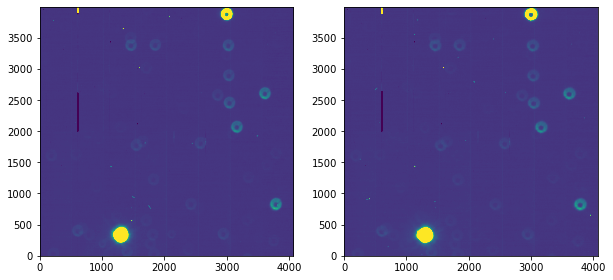

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(exp1.image.array, origin='lower', vmin=-10,vmax=200)
ax[1].imshow(exp2.image.array, origin='lower', vmin=-10,vmax=200)

In [28]:
expPair = [exp1,exp2]

In [42]:
expPair

### Run Task

In [47]:

# This will take around a minute on medium instance on RSP
zernikeOutput = estimateZernikeTask.run(expPair, donutCatalog)

TypeError: _getCamType() missing 1 required positional argument: 'instName'

[Aside]: Development of various parts: 

[Aside:] modify `EstiateZernikesBase` class 

In [18]:
import os
import numpy as np

import lsst.geom
import lsst.pipe.base as pipeBase
import lsst.pex.config as pexConfig
from lsst.daf.base import PropertyList
from lsst.pipe.base import connectionTypes

from lsst.ts.wep.WfEstimator import WfEstimator
from lsst.ts.wep.SourceProcessor import SourceProcessor
from lsst.ts.wep.Utility import getConfigDir, DonutTemplateType, DefocalType, CamType
from lsst.ts.wep.cwfs.DonutTemplateFactory import DonutTemplateFactory
from scipy.signal import correlate
from scipy.ndimage import rotate

from lsst.ts.wep.task.DonutStamps import DonutStamp, DonutStamps


class EstimateZernikesBaseConnections(
    pipeBase.PipelineTaskConnections, dimensions=("detector", "instrument")
):
    donutCatalog = connectionTypes.Input(
        doc="Donut Locations",
        dimensions=("instrument",),
        storageClass="DataFrame",
        name="donutCatalog",
    )
    donutStampsExtra = connectionTypes.Output(
        doc="Extra-focal Donut Postage Stamp Images",
        dimensions=("exposure", "detector", "instrument"),
        storageClass="StampsBase",
        name="donutStampsExtra",
    )
    donutStampsIntra = connectionTypes.Output(
        doc="Intra-focal Donut Postage Stamp Images",
        dimensions=("exposure", "detector", "instrument"),
        storageClass="StampsBase",
        name="donutStampsIntra",
    )
    outputZernikesRaw = connectionTypes.Output(
        doc="Zernike Coefficients from all donuts",
        dimensions=("exposure", "detector", "instrument"),
        storageClass="NumpyArray",
        name="zernikeEstimateRaw",
    )
    outputZernikesAvg = connectionTypes.Output(
        doc="Zernike Coefficients averaged over donuts",
        dimensions=("exposure", "detector", "instrument"),
        storageClass="NumpyArray",
        name="zernikeEstimateAvg",
    )


class EstimateZernikesBaseConfig(
    pipeBase.PipelineTaskConfig, pipelineConnections=EstimateZernikesBaseConnections
):
    # Config setting for pipeline task with defaults
    donutTemplateSize = pexConfig.Field(
        doc="Size of Template in pixels", dtype=int, default=160
    )
    donutStampSize = pexConfig.Field(
        doc="Size of donut stamps in pixels", dtype=int, default=160
    )
    initialCutoutPadding = pexConfig.Field(
        doc=str(
            "Additional padding in pixels on each side of initial "
            + "postage stamp of donutStampSize "
            + "to make sure we have a stamp of donutStampSize after recentroiding donut"
        ),
        dtype=int,
        default=40,
    )
    instName = pexConfig.Field(
        doc="Specify the instrument name (lsst, lsstfam, comcam, auxTel).", dtype=str, default="lsst"
    )

In [19]:
EstimateZernikeConfig = EstimateZernikesBaseConfig()


In [20]:
EstimateZernikeConfig.instName = "lsst"

[Aside:] add `_getInstName` method to `Instrument.py` 

In [4]:

def _getInstName(camType):
    """Get the instrument name.

    Parameters
    ----------
    camType : enum 'CamType'
        Camera type.

    Returns
    -------
    str
        Instrument name.

    Raises
    ------
    ValueError
        Camera type is not supported.
    """

    if camType == CamType.LsstCam:
        return "lsst"
    elif camType == CamType.LsstFamCam:
        return "lsstfam"
    elif camType == CamType.ComCam:
        return "comcam"
    elif camType == CamType.AuxTel:
        return "auxTel"
    else:
        raise ValueError("Camera type (%s) is not supported." % camType)

In [5]:
def _getCamType(instName):
    """ Get the camera type from instrument name.
    
    Parameters
    ----------
    instName: str
         Instrument name.
         
    Returns
    -------
    camType : enum 'CamType'
        Camera type.
        
    Raises
    ------
    ValueError
        Instrument name is not supported.
    """
    
    if instName == 'lsst':
        return CamType.LsstCam
    elif instName == 'lsstfam':
        return CamType.LsstFamCam
    elif instName == "comcam":
        return CamType.ComCam
    elif instName == "auxTel":
        return CamType.AuxTel
    else: 
        raise ValueError("Instrument name (%s) is not supported." % instName)

In [14]:
camType= _getCamType("auxTel")

In [15]:
camType.name

'AuxTel'

In [ ]:
EstimateZernikeConfig = 

Configure Task. The currently existing configurations are for full array mode (Fam) and corner wavefront sensors (cwfs). Need to write new configuration for AuxTel (latiss):

- edit EstimateZernikesBase.py getTemplate(), adding an option to pass CamType 

- 

[Aside;]  Make new `DonutTemplateModel()` class template model for Latiss by editing `cwfs/DonutTemplateModel.py` , so that  `getTemplate()` may call 
   
       template = templateMaker.makeTemplate(detectorName, defocalType, self.donutTemplateSize, self.camType)
       
       
       

In [5]:
from lsst.ts.wep.Utility import CamType
import os
import numpy as np
from lsst.ts.wep.Utility import getConfigDir, readPhoSimSettingData, CamType
from lsst.ts.wep.cwfs.DonutTemplateDefault import DonutTemplateDefault
from lsst.ts.wep.cwfs.Instrument import Instrument
from lsst.ts.wep.cwfs.CompensableImage import CompensableImage  
import lsst.obs.lsst as obs_lsst
import lsst.geom as geom
import lsst.afw.cameraGeom as cameraGeom

class DonutTemplateModel(DonutTemplateDefault):
    """Class to make the donut templates from the Instrument model."""

    def makeTemplate(
        self,
        sensorName,
        defocalType,
        imageSize,
        camType=CamType.LsstCam,
        pixelScale=0.2,
        opticalModel="offAxis"
       ,
    ):
        """Make the donut template image.

        Parameters
        ----------
        sensorName : str
            The camera detector for which we want to make a template. Should
            be in "Rxx_Sxx" format.
        defocalType : enum 'DefocalType'
            The defocal state of the sensor.
        imageSize : int
            Size of template in pixels. The template will be a square.
        camType : enum 'CamType', optional
            Camera type. (Default is CamType.LsstCam)
        pixelScale : float, optional
            The pixels to arcseconds conversion factor. (The default is 0.2)
        model : str, optional
            Optical model. It can be "paraxial", "onAxis", or "offAxis".
            (The default is "offAxis")
        
        Returns
        -------
        numpy.ndarray [int]
            The donut template as a binary image.
        """

        configDir = getConfigDir()
        
        # Load Instrument parameters
        instDir = os.path.join(configDir, "cwfs", "instData")
        inst = Instrument(instDir)
        
        if camType == CamType.LsstCam:
            inst.config(camType, imageSize)
            focalPlaneLayout = readPhoSimSettingData(
                configDir, "focalplanelayout.txt", "fieldCenter"
            )

            pixelSizeInUm = float(focalPlaneLayout[sensorName][2])
            sizeXinPixel = int(focalPlaneLayout[sensorName][3])

            sensorXMicron, sensorYMicron = np.array(
                focalPlaneLayout[sensorName][:2], dtype=float
            )
            
            
        elif camType == CamType.AuxTel:
            
            opticalModel="paraxial"
            # Defocal distance for Latiss in mm 
            # for LsstCam can use the default,
            # hence only need to set here 
            announcedDefocalDisInMm = 0.8   
            inst.config(camType, imageSize, announcedDefocalDisInMm)
            # load the info for auxTel 
            pixelSizeInMeters = inst.getCamPixelSize()  # pixel size in meters. 
            pixelSizeInUm = pixelSizeInMeters * 1e6
            
            camera = obs_lsst.Latiss.getCamera()
            detector = camera.get(sensorName) # only one detector in latiss 
            bbox = detector.getBBox()
            xp, yp = detector.getCenter(cameraGeom.FOCAL_PLANE)  # center of CCD in mm 
            
            # multiply by 1000 to for mm --> microns conversion
            sensorXMicron = yp * 1000  
            sensorYMicron = xp * 1000 
            
        else: 
            raise ValueError("Camera type (%s) is not supported." % camType)
            

        # Create image for mask
        img = CompensableImage()

        # Convert pixel locations to degrees
        sensorXPixel = float(sensorXMicron) / pixelSizeInUm
        sensorYPixel = float(sensorYMicron) / pixelSizeInUm

        # Multiply by pixelScale then divide by 3600 for arcsec->deg conversion
        sensorXDeg = sensorXPixel * pixelScale / 3600
        sensorYDeg = sensorYPixel * pixelScale / 3600
        fieldXY = [sensorXDeg, sensorYDeg]

        # Define position of donut at center of current sensor in degrees
        boundaryT = 0
        maskScalingFactorLocal = 1
        img.setImg(fieldXY, defocalType, image=np.zeros((imageSize, imageSize)))
        img.makeMask(inst, opticalModel, boundaryT, maskScalingFactorLocal)

        return img.getNonPaddedMask()


[aside]: developing `makeTemplate` for `AuxTel`

In [3]:
configDir = getConfigDir()

# Load Instrument parameters
instDir = os.path.join(configDir, "cwfs", "instData")
inst = Instrument(instDir)

camType = CamType.AuxTel
imageSize = 160
sensorName = 'RXX_S00'

announcedDefocalDisInMm = 0.8   
inst.config(camType, imageSize, announcedDefocalDisInMm)
# load the info for auxTel 
pixelSizeInMeters = inst.getCamPixelSize()  # pixel size in meters. 
pixelSizeInUm = pixelSizeInMeters * 1e6

camera = obs_lsst.Latiss.getCamera()
detector = camera.get(sensorName) # only one detector in latiss 
bbox = detector.getBBox()
xp, yp = detector.getCenter(cameraGeom.FOCAL_PLANE)  # center of CCD in mm 

# multiply by 1000 to for mm --> microns conversion
sensorXMicron = yp * 1000  
sensorYMicron = xp * 1000 

NameError: name 'cameraGeom' is not defined

In [84]:
# Create image for mask
img = CompensableImage()

# Convert pixel locations to degrees
sensorXPixel = float(sensorXMicron) / pixelSizeInUm
sensorYPixel = float(sensorYMicron) / pixelSizeInUm

# Multiply by pixelScale then divide by 3600 for arcsec->deg conversion
sensorXDeg = sensorXPixel * pixelScale / 3600
sensorYDeg = sensorYPixel * pixelScale / 3600
fieldXY = [sensorXDeg, sensorYDeg]

# Define position of donut at center of current sensor in degrees
boundaryT = 0
maskScalingFactorLocal = 1
img.setImg(fieldXY, defocalType, image=np.zeros((imageSize, imageSize)))

In [86]:
img.makeMaskList(inst, model='offAxis')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [85]:
img.makeMask(inst, opticalModel, boundaryT, maskScalingFactorLocal)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [41]:
pixelSizeInMeters = inst.getCamPixelSize()  # pixel size in meters. 
pixelSizeInUm = pixelSizeInMeters * 1e6
pixelSizeInUm

10.0

Test donut mask for lsstCam 

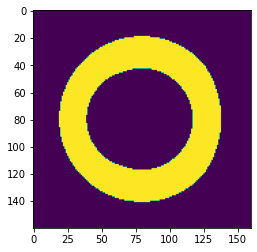

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

detectorName = 'R22_S21'
defocalType = 'extra'
donutTemplateSize = 160

camType = CamType.LsstCam


opticalModel="offAxis"
pixelScale=0.2
    
templateMaker = DonutTemplateModel()
template = templateMaker.makeTemplate(detectorName, defocalType,
        donutTemplateSize, camType=camType, opticalModel="offAxis",
        pixelScale=0.2)

plt.imshow(template)
                    

Test donut mask for AuxTel

In [6]:
detectorName = 'RXX_S00' # the only Latiss detector
defocalType = 'extra'
donutTemplateSize = 160
pixelScale = 0.09569499991688767
camType = CamType.AuxTel

templateMaker = DonutTemplateModel()
template = templateMaker.makeTemplate(detectorName, defocalType,
        donutTemplateSize, camType=camType, opticalModel="offAxis",
        pixelScale=pixelScale)

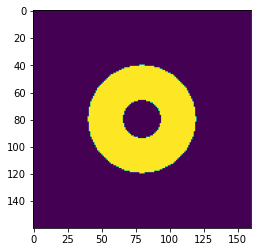

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(template)

ok, works fine! Next: test where it fails...

In [74]:
configDir = getConfigDir()
camType = CamType.AuxTel
imageSize = 160
announcedDefocalDisInMm = 0.8
# Load Instrument parameters
instDir = os.path.join(configDir, "cwfs", "instData")
inst = Instrument(instDir)
inst.config(camType, imageSize, announcedDefocalDisInMm)

In [ ]:
pixelSizeInUm = float(focalPlaneLayout[sensorName][2])
            sizeXinPixel = int(focalPlaneLayout[sensorName][3])

            sensorXMicron, sensorYMicron 

In [42]:
detector.getPixelSize()

Extent2D(0.01, 0.01)

In [20]:
sizeXinPixel

4004

In [21]:
sensorXMicron

42250.0

In [22]:
sensorYMicron

0.0

In [23]:
fieldXY

[0.23472222222222222, 0.0]

In [46]:
import lsst.geom as geom
import lsst.afw.cameraGeom as cameraGeom
import lsst.obs.lsst as obs_lsst
camera = obs_lsst.Latiss.getCamera()

#camera = obs_lsst.LsstCam.getCamera()
#detector = camera.get('R22_S21')
for detector in camera:
    bbox = detector.getBBox()
    xp, yp = detector.getCenter(cameraGeom.FOCAL_PLANE)  # centre of CCD in mm 

    yaw = detector.getOrientation().getYaw().asDegrees()  # rotation in the plane of the camera  (also getPitch() and getRoll(); see afw/cameraGeom/Orientation.h)
    print(f"{detector.getName():10} ({xp:9.4f}, {yp:9.4f}) mm  {yaw} deg")

RXX_S00    (  -0.5250,   -0.0650) mm  0.0 deg


In [45]:
yp

42.25

In [44]:
sensorXmicron = yp * 1000

42.25

In [31]:
detector.getPixelSize()

Extent2D(0.01, 0.01)

In [39]:
xp,yp = detector.getCenter(cameraGeom.FIELD_ANGLE)

In [40]:
yp

0.004096675605375579

**[Aside:]** debugging `donutCatalogList`

Try to run these tasks and see why there are no objects in `donutCatalogList` : 



In [27]:
refObjLoader = donutCatTask.getRefObjLoader(deferredList)

In [28]:
refObjLoader

In [14]:
from lsst.obs.base import createInitialSkyWcsFromBoresight

In [15]:
donutCatTask.boresightPointing

SpherePoint(297.834389641502*geom.degrees, -58.4925471458268*geom.degrees)

In [16]:
donutCatTask.boresightRotAng

25.7151863184216

In [18]:
import lsst.geom
import lsst.obs.lsst as obs_lsst

detectorList = []
donutCatalogList = []
camera = obs_lsst.Latiss.getCamera()

# there's just one detector in Latiss to make it easier...
detector = camera['RXX_S00']

#for detector in camera:
detWcs = createInitialSkyWcsFromBoresight(
    donutCatTask.boresightPointing,
    donutCatTask.boresightRotAng * lsst.geom.degrees,
    detector,
    flipX=False,
)



In [19]:
detWcs

FITS standard SkyWcs:
Sky Origin: (297.8343896415, -58.4925471458)
Pixel Origin: (2088, 2006)
Pixel Scale: 0.095695 arcsec/pixel

In [20]:
# the filter name is set in
# filterName = pexConfig.Field(doc="Reference filter", dtype=str, default="g")
donutCatTask.filterName

'g'

In [59]:
refObjLoader.loadPixelBox??

In [60]:
donutCatTask.filterName

'g'

In [30]:
len(refObjLoader.config.filterMap)

0

In [21]:
# need to update 
# the filter mapping for the 
# reference object loader 
refObjLoader.config.filterMap = {"g": "phot_g_mean" }

# Match detector layout to reference catalog
donutCatalog = refObjLoader.loadPixelBox(
    detector.getBBox(), detWcs, filterName='g').refCat

#config.calibrate.refObjLoader.filterMap = {"g": "phot_g_mean_mag" }

root INFO: Loading reference objects from region bounded by [297.69231379, 297.98077969], [-58.56822692, -58.41836906] RA Dec
root INFO: Loaded 221 reference objects


The code is here https://github.com/lsst/meas_algorithms/blob/master/python/lsst/meas/algorithms/loadReferenceObjects.py 

In [57]:
from lsst.meas.algorithms import ReferenceObjectLoader

In [58]:
ReferenceObjectLoader.loadPixelBox?

In [22]:
detectorList.append(detector.getName())
donutCatalogList.append(donutCatalog)

In [ ]:
donutCatalogList[:10]

In [24]:
this doesn't work properly, because it checks for 
`sourceFlux.append(donutCatalog[f"{self.filterName}_flux"])`
whereas it should check for phot_g_mean_flux

fieldObjects = donutCatTask.donutCatalogListToDataFrame(donutCatalogList, detectorList)

In [25]:
fieldObjects

coord_ra  coord_dec   centroid_x   centroid_y  source_flux detector
0    5.198804  -1.021757   653.219991   615.972550          NaN  RXX_S00
1    5.196814  -1.021203  3189.238069   720.084519          NaN  RXX_S00
2    5.198801  -1.021199  1177.698091  1698.170744          NaN  RXX_S00
3    5.197345  -1.020926  2910.604693  1517.382422          NaN  RXX_S00
4    5.198023  -1.021826  1380.952142   101.916337          NaN  RXX_S00
..        ...        ...          ...          ...          ...      ...
216  5.197414  -1.019989  3717.629063  3371.528097          NaN  RXX_S00
217  5.198141  -1.019966  3001.092591  3771.676609          NaN  RXX_S00
218  5.198302  -1.019944  2856.975187  3893.273769          NaN  RXX_S00
219  5.197747  -1.020624  2784.215180  2300.431841          NaN  RXX_S00
220  5.197157  -1.020112  3862.987955  3005.828752          NaN  RXX_S00

[221 rows x 6 columns]

In [ ]:
donutCatalogList[0]['g_camFlux']

In [75]:
this doesn't work properly, because it checks for 
`sourceFlux.append(donutCatalog[f"{self.filterName}_flux"])`
whereas it should check for 

coord_ra  coord_dec   centroid_x   centroid_y  source_flux detector
0    5.198804  -1.021757   653.219991   615.972550          NaN  RXX_S00
1    5.196814  -1.021203  3189.238069   720.084519          NaN  RXX_S00
2    5.198801  -1.021199  1177.698091  1698.170744          NaN  RXX_S00
3    5.197345  -1.020926  2910.604693  1517.382422          NaN  RXX_S00
4    5.198023  -1.021826  1380.952142   101.916337          NaN  RXX_S00
..        ...        ...          ...          ...          ...      ...
216  5.197414  -1.019989  3717.629063  3371.528097          NaN  RXX_S00
217  5.198141  -1.019966  3001.092591  3771.676609          NaN  RXX_S00
218  5.198302  -1.019944  2856.975187  3893.273769          NaN  RXX_S00
219  5.197747  -1.020624  2784.215180  2300.431841          NaN  RXX_S00
220  5.197157  -1.020112  3862.987955  3005.828752          NaN  RXX_S00

[221 rows x 6 columns]

In [13]:
camera = obs_lsst.Latiss.getCamera()
for detector in camera:
    print(detector.getName())
detector  = camera['RXX_S00']
print(detector.getPhysicalType())
print(detector.getSerial())
for amp in detector:
    print(amp.getName(), amp.getGain())

RXX_S00
ITL
ITL-3800C-068
C10 1.0811
C11 1.047
C12 1.0795
C13 1.081
C14 1.0644
C15 1.0669
C16 1.0795
C17 1.056
C07 1.1033
C06 1.1039
C05 1.1047
C04 1.084
C03 1.0939
C02 1.0874
C01 1.0933
C00 1.0972


Make a new branch on `ts_wep` to edit that:

    git checkout -b tickets/DM-31655 
    
    